In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# Load required packages
library(alakazam)
library(ggplot2)
library(dplyr)

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# Load example data
data(ExampleDb)
names(ExampleDb)

 [1] "SEQUENCE_ID"          "SEQUENCE_IMGT"        "GERMLINE_IMGT_D_MASK"
 [4] "V_CALL"               "V_CALL_GENOTYPED"     "D_CALL"              
 [7] "J_CALL"               "JUNCTION"             "JUNCTION_LENGTH"     
[10] "NP1_LENGTH"           "NP2_LENGTH"           "SAMPLE"              
[13] "ISOTYPE"              "DUPCOUNT"             "CLONE"               


In [4]:
%%R
dplyr::select(ExampleDb[1:3, ], starts_with("V"))

                V_CALL V_CALL_GENOTYPED
1 Homsap IGHV3-11*05 F      IGHV3-11*05
2 Homsap IGHV3-48*03 F      IGHV3-48*03
3 Homsap IGHV3-20*01 F      IGHV3-20*01


In [5]:
%%R
clones <- countClones(ExampleDb, groups=c("SAMPLE", "ISOTYPE"), copy="DUPCOUNT")
head(clones, 5)

Source: local data frame [5 x 7]
Groups: SAMPLE, ISOTYPE [2]

  SAMPLE ISOTYPE CLONE SEQ_COUNT COPY_COUNT   SEQ_FREQ  COPY_FREQ
   <chr>   <chr> <chr>     <int>      <int>      <dbl>      <dbl>
1    +7d     IgA  3128        88        651 0.33082707 0.49732620
2    +7d     IgG  3100        49        279 0.09280303 0.17296962
3    +7d     IgA  3141        44        240 0.16541353 0.18334607
4    +7d     IgG  3192        19        141 0.03598485 0.08741476
5    +7d     IgG  3177        29        130 0.05492424 0.08059516


In [6]:
%%R
cloneabund <- estimateAbundance(ExampleDb, group="SAMPLE", ci=0.95, nboot=200)
head(cloneabund,5)


# A tibble: 5 × 6
  GROUP CLONE           P       LOWER       UPPER  RANK
  <chr> <chr>       <dbl>       <dbl>       <dbl> <int>
1   -1h  8365 0.011999814 0.005183406 0.018816221     1
2   -1h  6465 0.007993219 0.002613064 0.013373374     2
3   -1h  5060 0.006983872 0.001416767 0.012550977     3
4   -1h  6985 0.005962422 0.001193472 0.010731372     4
5   -1h  1574 0.004914877 0.000714438 0.009115315     5


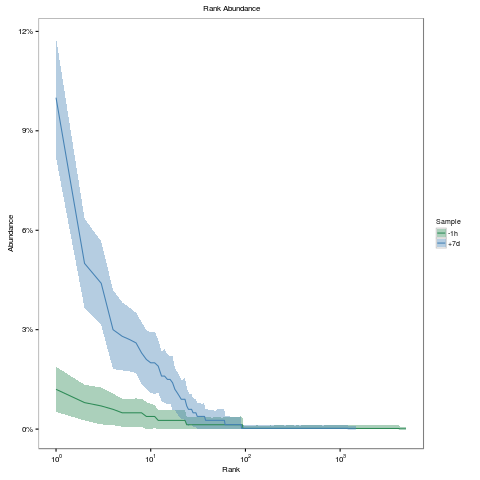

In [7]:
%%R
sample_colors <- c("-1h"="seagreen", "+7d"="steelblue")
plotAbundance(cloneabund, colors=sample_colors, legend_title="Sample")

In [8]:
%%R
# Compare diversity curve across values in the "SAMPLE" column
# q ranges from 0 (min_q=0) to 32 (max_q=32) in 0.05 incriments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 2000 resampling realizations are performed (nboot=200)
sample_div <- rarefyDiversity(ExampleDb, "SAMPLE", min_q=0, max_q=32, step_q=0.05, 
                                 ci=0.95, nboot=200)

# Compare diversity curve across values in the "ISOTYPE" column
# Analyse is restricted to ISOTYPE values with at least 30 sequences by min_n=30
# Excluded groups are indicated by a warning message
isotype_div <- rarefyDiversity(ExampleDb, "ISOTYPE", min_n=30, min_q=0, max_q=32, 
                                  step_q=0.05, ci=0.95, nboot=200)


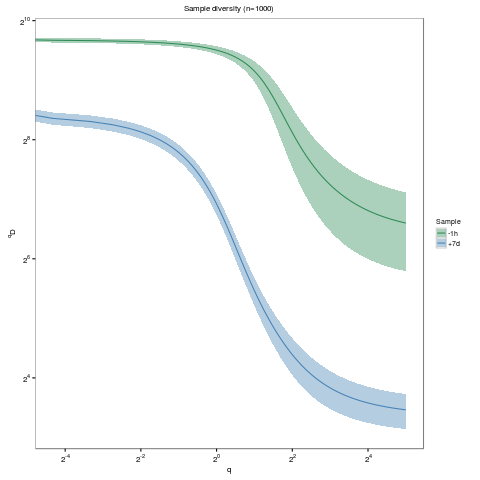

In [9]:
%%R
# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity (n=", sample_div@n, ")")
sample_colors <- c("-1h"="seagreen", "+7d"="steelblue")
plotDiversityCurve(sample_div, colors=sample_colors, main_title=sample_main, 
                  legend_title="Sample", log_q=TRUE, log_d=TRUE)

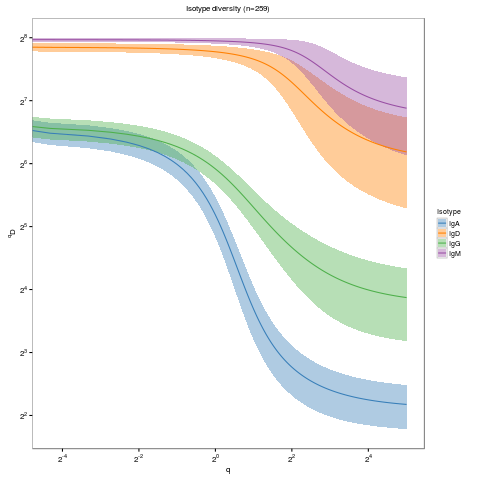

In [10]:
%%R
# Plot isotype diversity using default set of Ig isotype colors
isotype_main <- paste0("Isotype diversity (n=", isotype_div@n, ")")
plotDiversityCurve(isotype_div, colors=IG_COLORS, main_title=isotype_main, 
                   legend_title="Isotype", log_q=TRUE, log_d=TRUE)

In [11]:
%%R
# Test diversity at q=0 (species richness) across values in the "SAMPLE" column
# 2000 bootstrap realizations are performed (nboot=200)
sample_test <- testDiversity(ExampleDb, 0, "SAMPLE", nboot=200)